### 은행으로부터 돈을 많이 빌린 고객일수록 은행입장에선 중요한 고객이다.

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_25136\1541119564.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_mean = df.groupby('Segment')[num_cols].mean().round(2)


Segment별 평균 금액 비교:
         정상청구원금_B0M  이용금액_할부_B0M  이용금액_일시불_B0M
Segment                                       
A          37301.33      2885.35      19983.32
B          37205.75      5171.75      18484.12
C          18650.37      1496.03      11799.50
D          10730.00      1096.58       7645.84
E           3467.85       349.05       2530.33


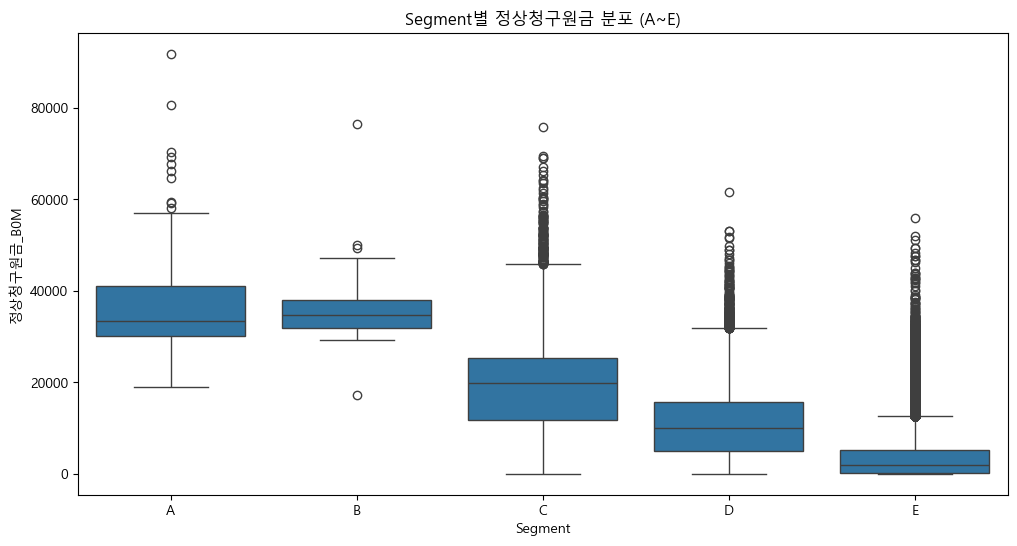

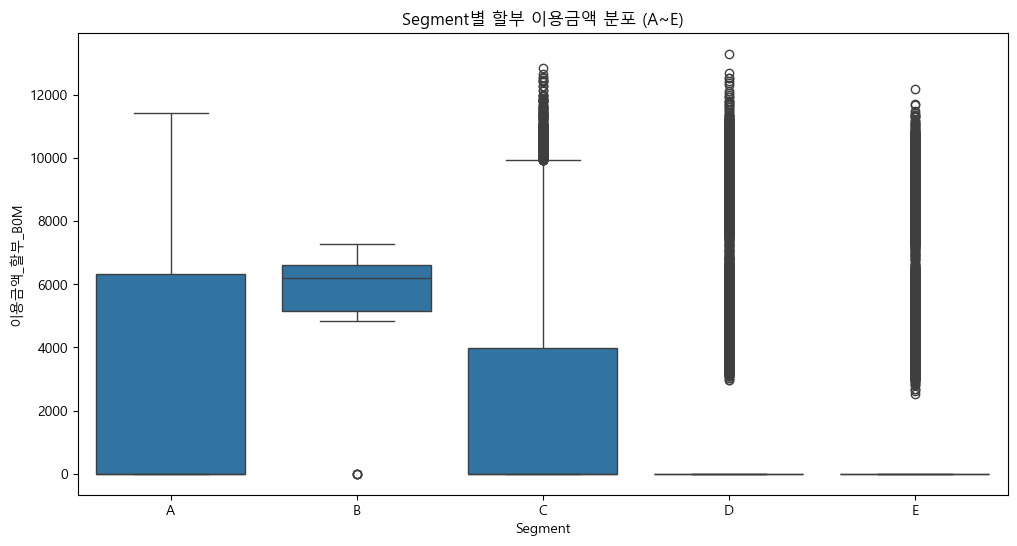

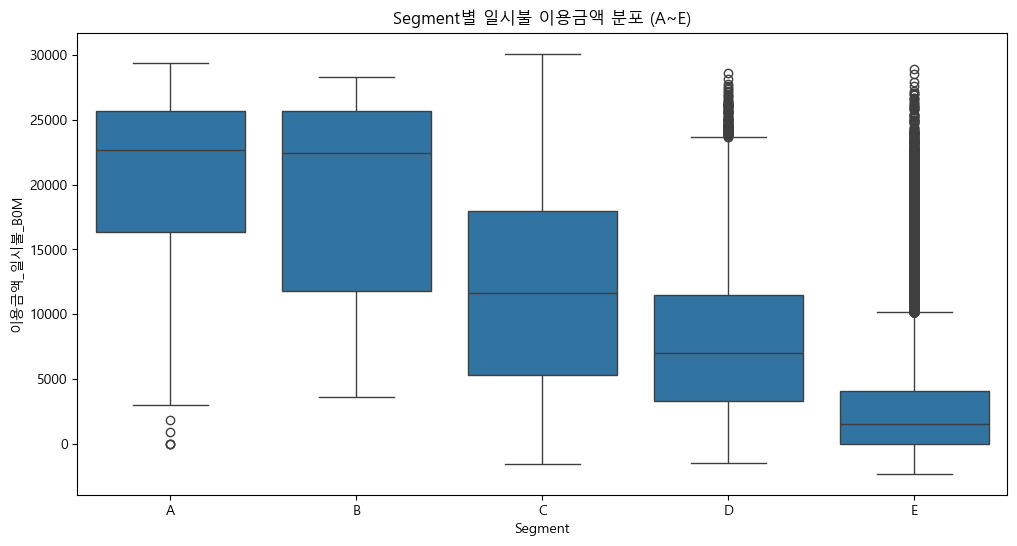

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import matplotlib as mpl

# ✅ 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

# 파일 불러오기
df_member = pd.read_parquet("open/train/1.회원정보/201807_train_회원정보.parquet")
df_approval = pd.read_parquet("open/train/3.승인매출정보/201807_train_승인매출정보.parquet")

# 필요한 컬럼만 추출
cols = [
    'ID', 
    '정상청구원금_B0M', 
    '이용금액_할부_B0M', 
    '이용금액_일시불_B0M'
]
df_approval = df_approval[cols]

# 병합
df = pd.merge(df_approval, df_member[['ID', 'Segment']], on='ID', how='inner')

# Segment 문자로 통일 후 순서 지정
df['Segment'] = df['Segment'].astype(str)
df['Segment'] = pd.Categorical(df['Segment'], categories=['A', 'B', 'C', 'D', 'E'], ordered=True)

# 결측치 처리 (숫자 컬럼만)
num_cols = ['정상청구원금_B0M', '이용금액_할부_B0M', '이용금액_일시불_B0M']
df[num_cols] = df[num_cols].fillna(0)

# Segment별 평균 계산
group_mean = df.groupby('Segment')[num_cols].mean().round(2)
print("Segment별 평균 금액 비교:")
print(group_mean)

# 시각화
plt.figure(figsize=(12, 6))
sns.boxplot(x='Segment', y='정상청구원금_B0M', data=df)
plt.title('Segment별 정상청구원금 분포 (A~E)')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Segment', y='이용금액_할부_B0M', data=df)
plt.title('Segment별 할부 이용금액 분포 (A~E)')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Segment', y='이용금액_일시불_B0M', data=df)
plt.title('Segment별 일시불 이용금액 분포 (A~E)')
plt.show()

### 카드 사용 빈도수가 많을수록 은행 입장에서 좋은 고객일 것이다.

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_30496\797539123.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_mean = df.groupby('Segment')['총거래빈도'].mean().round(2)


Segment별 거래빈도 평균:
Segment
A    53.27
B    55.21
C    38.75
D    30.42
E    11.46
Name: 총거래빈도, dtype: float64


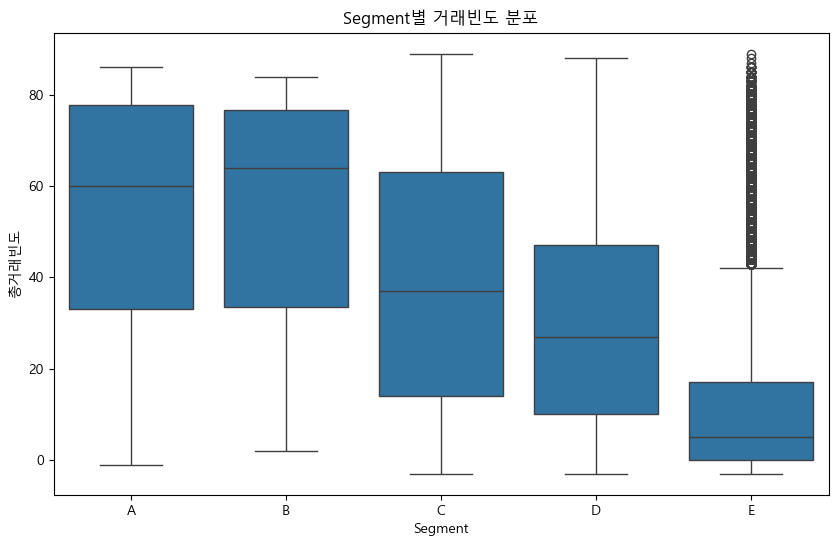

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (윈도우 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

# 데이터 불러오기
df_member = pd.read_parquet("open/train/1.회원정보/201807_train_회원정보.parquet")
df_approval = pd.read_parquet("open/train/3.승인매출정보/201807_train_승인매출정보.parquet")

# 거래빈도 관련 컬럼 선택
cols = ['ID', '이용건수_일시불_B0M', '이용건수_할부_B0M']
df_approval = df_approval[cols]

# 회원정보 병합
df = pd.merge(df_approval, df_member[['ID', 'Segment']], on='ID', how='inner')

# 결측치 처리
df[['이용건수_일시불_B0M', '이용건수_할부_B0M']] = df[['이용건수_일시불_B0M', '이용건수_할부_B0M']].fillna(0)

# Segment 문자형 및 순서 지정
df['Segment'] = df['Segment'].astype(str)
df['Segment'] = pd.Categorical(df['Segment'], categories=['A', 'B', 'C', 'D', 'E'], ordered=True)

# 거래빈도 총합 컬럼 생성
df['총거래빈도'] = df['이용건수_일시불_B0M'] + df['이용건수_할부_B0M']

# Segment별 거래빈도 평균 확인
group_mean = df.groupby('Segment')['총거래빈도'].mean().round(2)
print("Segment별 거래빈도 평균:")
print(group_mean)

# 시각화
plt.figure(figsize=(10,6))
sns.boxplot(x='Segment', y='총거래빈도', data=df)
plt.title('Segment별 거래빈도 분포')
plt.show()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_30496\2632195307.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_mean = df.groupby('Segment')['정상청구원금_B0M'].mean().round(2)


Segment별 정상청구원금(자산 규모) 평균:
Segment
A    37301.33
B    37205.75
C    18650.37
D    10730.00
E     3467.85
Name: 정상청구원금_B0M, dtype: float64


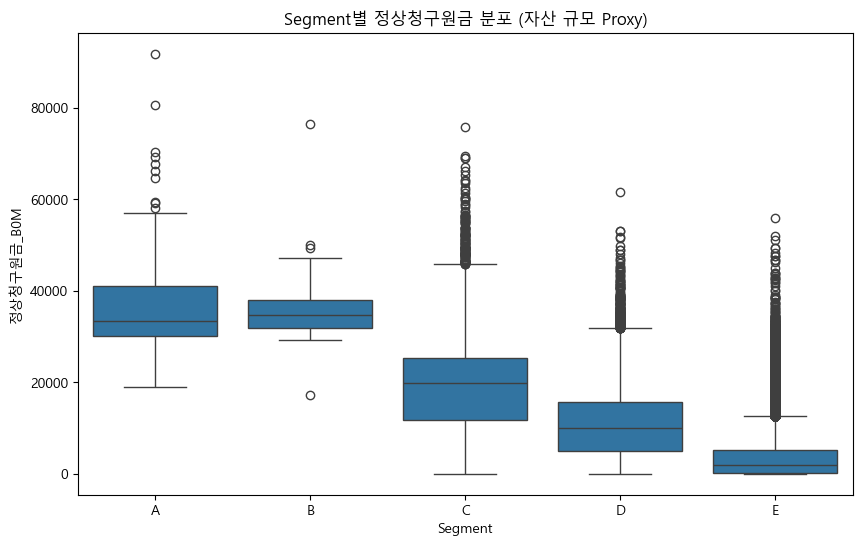

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

# 데이터 불러오기
df_member = pd.read_parquet("open/train/1.회원정보/201807_train_회원정보.parquet")
df_approval = pd.read_parquet("open/train/3.승인매출정보/201807_train_승인매출정보.parquet")

# 필요한 컬럼 선택
cols = ['ID', '정상청구원금_B0M']
df_approval = df_approval[cols]

# 회원정보 병합
df = pd.merge(df_approval, df_member[['ID', 'Segment']], on='ID', how='inner')

# 결측치 0으로 처리
df['정상청구원금_B0M'] = df['정상청구원금_B0M'].fillna(0)

# Segment 문자형, 순서 지정
df['Segment'] = df['Segment'].astype(str)
df['Segment'] = pd.Categorical(df['Segment'], categories=['A', 'B', 'C', 'D', 'E'], ordered=True)

# 그룹별 자산(대출 잔액) 평균 비교
group_mean = df.groupby('Segment')['정상청구원금_B0M'].mean().round(2)
print("Segment별 정상청구원금(자산 규모) 평균:")
print(group_mean)

# 시각화
plt.figure(figsize=(10,6))
sns.boxplot(x='Segment', y='정상청구원금_B0M', data=df)
plt.title('Segment별 정상청구원금 분포 (자산 규모 Proxy)')
plt.show()


- A등급이 B등급보다 자산의 평균은 더 높은 반면, B등급이 카드 사용 빈도수는 더 높은걸로 보아 A등급 고객들은 큰 금액을 소수 거래하는 부류라고 볼 수 있다.
- 반면, B등급은 자산 규모는 작지만 거래빈도가 많아 충성도가 높다고 볼 수 있다.

### 잔액이 많고 자산이 큰 고객들의 등급의 위치를 확인해보자

- 잔액이 많고 자산이 큰 고객들은 은행입장에서 중요한 고객일 수 밖에 없으므로 Segment의 분류점을 짐작해볼 수 있다.

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_30496\271071862.py:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_mean = df.groupby('Segment')[['총잔액', '연체잔액_B0M']].mean().round(2)


Segment별 평균 잔액 및 연체잔액:
              총잔액  연체잔액_B0M
Segment                    
A        89802.91      0.00
B        97992.54      0.00
C        44721.59     24.42
D        29091.08     37.89
E        10190.03     17.72


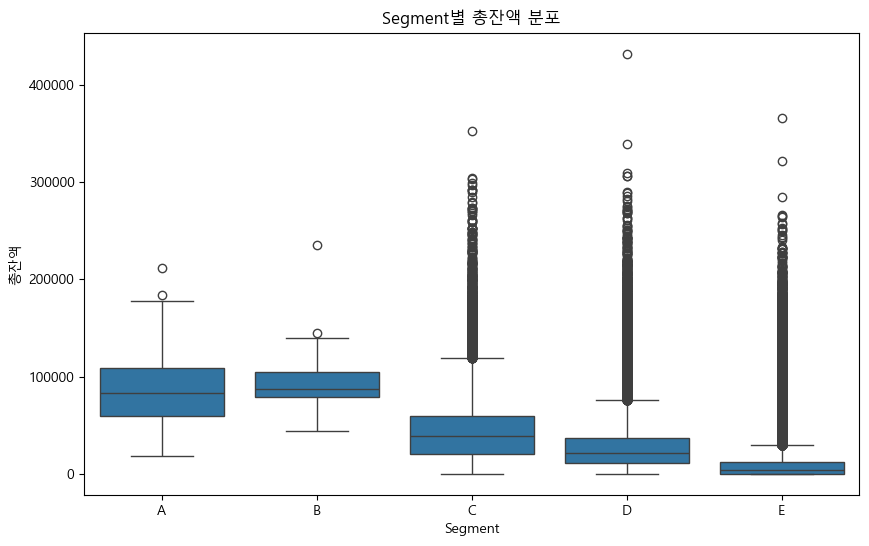

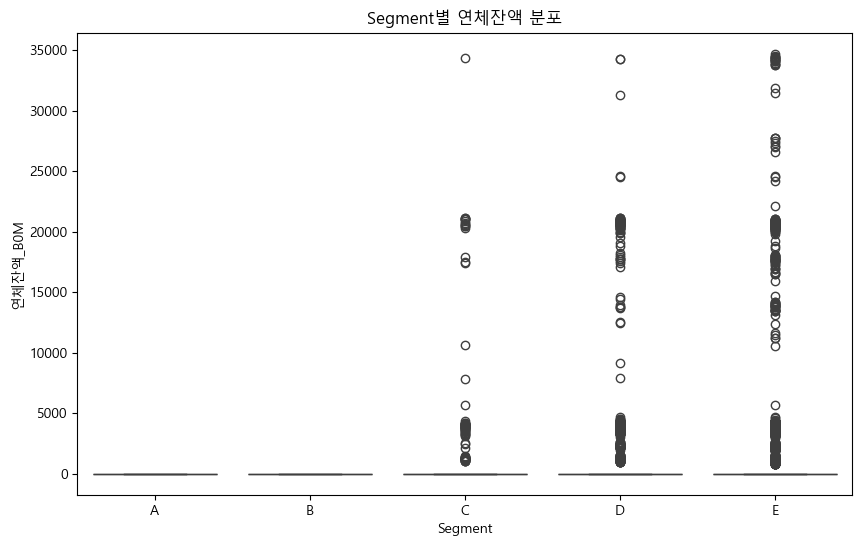


총잔액과 연체잔액 상관계수:
               총잔액  연체잔액_B0M
총잔액       1.000000  0.030286
연체잔액_B0M  0.030286  1.000000


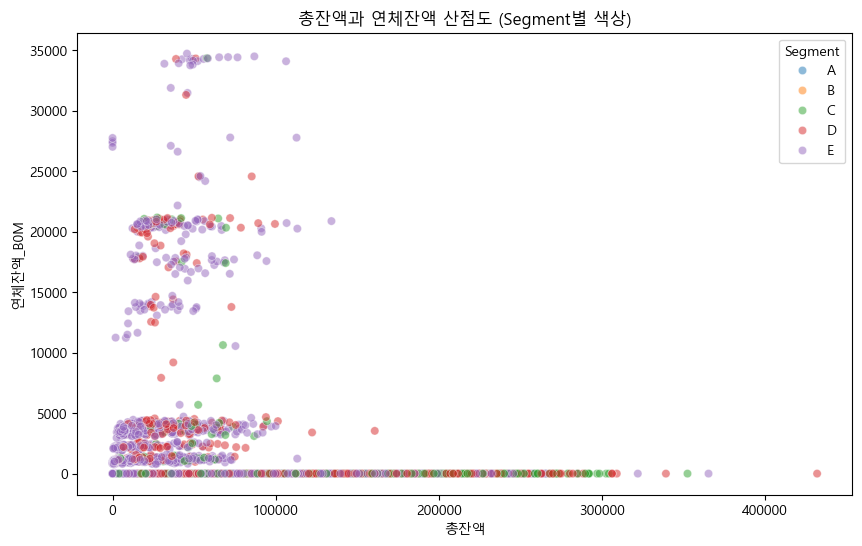

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

# 데이터 불러오기
df_member = pd.read_parquet("open/train/1.회원정보/201807_train_회원정보.parquet")
df_balance = pd.read_parquet("open/train/5.잔액정보/201807_train_잔액정보.parquet")

# 분석할 잔액 컬럼 선택
balance_cols = [
    '잔액_일시불_B0M',
    '잔액_할부_B0M',
    '잔액_현금서비스_B0M',
    '잔액_카드론_B0M',
    '월중평잔_일시불_B0M',
    '월중평잔_할부_B0M',
    'RV_평균잔액_R6M',
]

# 필요한 컬럼만 추출
df_balance = df_balance[['ID'] + balance_cols + ['연체잔액_B0M']]

# 결측치는 0으로 대체
df_balance[balance_cols + ['연체잔액_B0M']] = df_balance[balance_cols + ['연체잔액_B0M']].fillna(0)

# 회원정보와 병합
df = pd.merge(df_balance, df_member[['ID', 'Segment']], on='ID', how='inner')

# Segment 문자형 및 순서 지정
df['Segment'] = df['Segment'].astype(str)
df['Segment'] = pd.Categorical(df['Segment'], categories=['A', 'B', 'C', 'D', 'E'], ordered=True)

# 총잔액 컬럼 생성 (잔액 합산)
df['총잔액'] = df[balance_cols].sum(axis=1)

# 그룹별 평균 계산
group_mean = df.groupby('Segment')[['총잔액', '연체잔액_B0M']].mean().round(2)
print("Segment별 평균 잔액 및 연체잔액:")
print(group_mean)

# 시각화 1: 총잔액 분포
plt.figure(figsize=(10,6))
sns.boxplot(x='Segment', y='총잔액', data=df)
plt.title('Segment별 총잔액 분포')
plt.show()

# 시각화 2: 연체잔액 분포
plt.figure(figsize=(10,6))
sns.boxplot(x='Segment', y='연체잔액_B0M', data=df)
plt.title('Segment별 연체잔액 분포')
plt.show()

# 상관관계 계산
corr = df[['총잔액', '연체잔액_B0M']].corr()
print("\n총잔액과 연체잔액 상관계수:")
print(corr)

# Segment별 총잔액과 연체잔액 관계 산점도
plt.figure(figsize=(10,6))
sns.scatterplot(x='총잔액', y='연체잔액_B0M', hue='Segment', data=df, alpha=0.5)
plt.title('총잔액과 연체잔액 산점도 (Segment별 색상)')
plt.show()

- 등급이 낮을수록 연체 잔액의 비중이 크다는 것을 알 수 있다.

### A와 B의 차이를 조금 더 깊게 알아보자.

              총잔액  연체잔액_B0M  이용건수_일시불_B0M  상환개월수_결제일_R6M  선결제건수_R6M
Segment                                                            
A        89802.91       0.0         52.43           5.20       0.62
B        97992.54       0.0         53.71           3.25       2.62


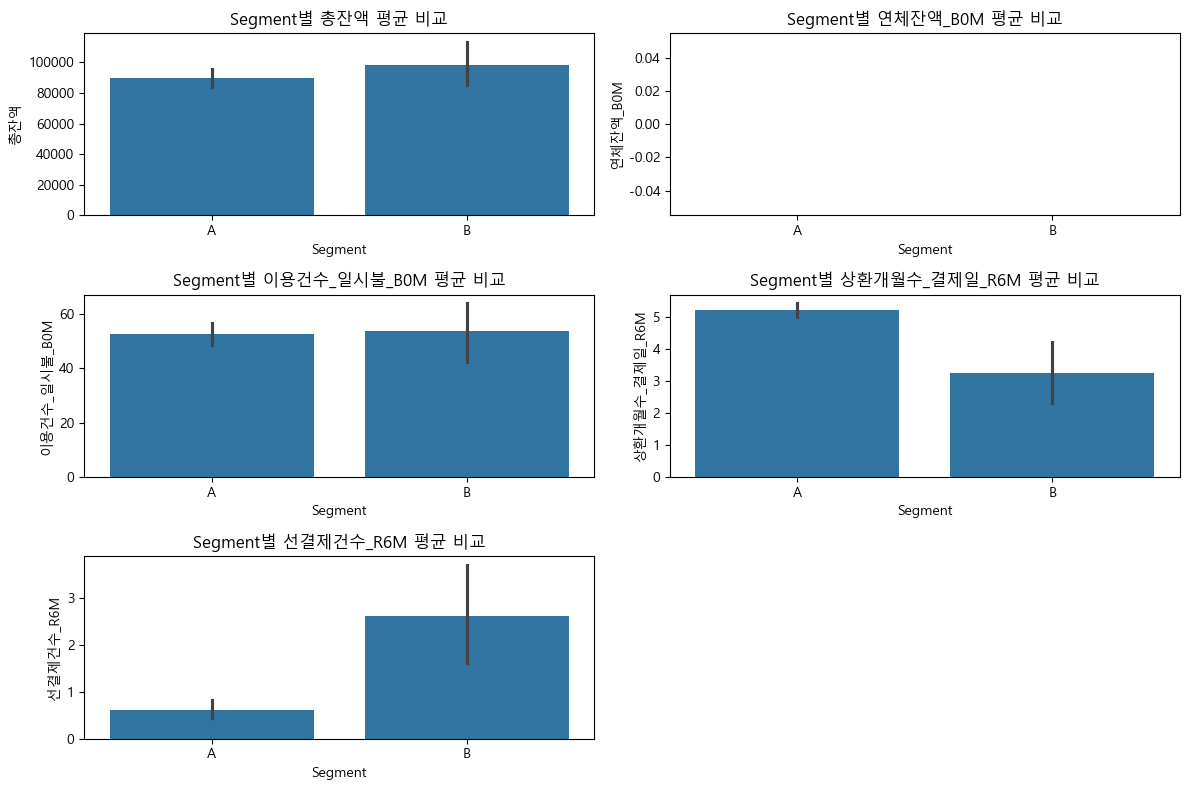

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

# 데이터 불러오기
df_member = pd.read_parquet("open/train/1.회원정보/201807_train_회원정보.parquet")
df_balance = pd.read_parquet("open/train/5.잔액정보/201807_train_잔액정보.parquet")
df_approval = pd.read_parquet("open/train/3.승인매출정보/201807_train_승인매출정보.parquet")
df_payment = pd.read_parquet("open/train/4.청구입금정보/201807_train_청구정보.parquet")

# 필요한 컬럼 선택 및 병합
df = df_member[['ID', 'Segment']]
df = df[df['Segment'].isin(['A', 'B'])]  # A, B 등급만 선택

# 잔액 주요 컬럼 합산
balance_cols = [
    '잔액_일시불_B0M',
    '잔액_할부_B0M',
    '잔액_현금서비스_B0M',
    '잔액_카드론_B0M',
    '월중평잔_일시불_B0M',
    '월중평잔_할부_B0M',
    'RV_평균잔액_R6M',
]
df_balance_sel = df_balance[['ID'] + balance_cols + ['연체잔액_B0M']].fillna(0)
df = pd.merge(df, df_balance_sel, on='ID', how='left').fillna(0)
df['총잔액'] = df[balance_cols].sum(axis=1)

# 거래빈도(예시: 승인매출 이용건수_일시불_B0M)
df_approval_sel = df_approval[['ID', '이용건수_일시불_B0M']].fillna(0)
df = pd.merge(df, df_approval_sel, on='ID', how='left').fillna(0)

# 상환 관련(예: 상환개월수_결제일_R6M)
df_payment_sel = df_payment[['ID', '상환개월수_결제일_R6M', '선결제건수_R6M']].fillna(0)
df = pd.merge(df, df_payment_sel, on='ID', how='left').fillna(0)

# 그룹별 평균값 계산
group_stats = df.groupby('Segment').agg({
    '총잔액': 'mean',
    '연체잔액_B0M': 'mean',
    '이용건수_일시불_B0M': 'mean',
    '상환개월수_결제일_R6M': 'mean',
    '선결제건수_R6M': 'mean'
}).round(2)

print(group_stats)

# 시각화 - A vs B 주요 지표 비교
metrics = ['총잔액', '연체잔액_B0M', '이용건수_일시불_B0M', '상환개월수_결제일_R6M', '선결제건수_R6M']

plt.figure(figsize=(12,8))
for i, metric in enumerate(metrics, 1):
    plt.subplot(3, 2, i)
    sns.barplot(x='Segment', y=metric, data=df[df['Segment'].isin(['A', 'B'])])
    plt.title(f'Segment별 {metric} 평균 비교')
plt.tight_layout()
plt.show()

### A등급 고객 특징
- 상환개월수가 길어 '꾸준함'과 '신뢰성'이 높음
- 연체도 없고 안정적인 고객임
- 거래 빈도나 선결제 횟수는 B보다 적을 수 있으나, 금융 안정성 측면에서는 더 우수함

### B등급 고객 특징
- 거래 규모 크고, 거래도 자주하며, 선결제도 많이 하는 적극적인 고객
- 즉, 활동성과 충성도 면에서 강점을 가지고 있음.
- 하지만 상환기간이 상대적으로 짧아 신용관리가 오래되지 않았거나 신규 고객일 가능성 있음.

### C등급 : 중간 수준의 고객
- 평균적인 사용 패턴, 입출금의 균형이 맞거나 약간 부족함.
- 은행입장에서는 잠재 고객군으로 적극적인 마케팅 또는 관리 대상, 신용도나 수익 기여도는 중간정도.

### D등급 : 저활동 또는 관리 필요 고객
- 거래빈도가 낮고, 카드 사용 및 입금액이 적음 / 청구-입금 불균형 가능성 있음
- 은행 입장에서는 리스크 관리 또는 소극적 고객군으로 수익성이 낮거나, 관리 리소스 대비 효율이 떨어지는 고객

### E등급 : 문제고객 또는 이탈 가능성 고객
- 입금 지연 / 연체 이력이 있는 고객 , 사용 실적 매우 낮음 또는 이상 거래 가능성 있음
- 은행 입장에서는 리스크가 크거나, 이미 관계가 소극적인 고객일 가능성 높음.

### 종합 결론 및 인사이트
- B는 '활발한 신용 사용자'로서 성장 가능성이 큰 고객군으로 판단할 수 있음.
- A는 '안정적이고 신뢰할 수 있는 고액 자산 고객'으로 평가할 수 있음.
- 은행 입장에서는 B고객을 계속 충성도 높게 유지 / 관리하면서 상환 기간을 늘리도록 유도하고, A고객의 안정성을 기반으로 장기적인 리스크 관리를 하는 전략을 병행하는 것이 가장 효과적이라고 판단됨. 